This algorithm will be primarily for finding two sigma outliers in quantifiable data (e.g. protein, transcriptomics, etc.) in order to find trends.  These trends may include certain proteins having more outliers than others, having a common thread between cancer subtypes, or being randomly distributed.  We will be dropping missing values, and creating a new dataframe based on whether a certain protein concentration (or other quantifiable data) is considered an outlier for a particular sample.  We will then use that dataframe to make binary classifications on cancer based on a user input.  For example, we may want to find if PTEN concentration is abnormally high in women over the age of 50 with a certain type of cancer.  We will then make those binary classifications into a dataframe. Ideally, this will then be mapped to a drug database for people to know if certain drugs may be more helpful to them based on those concentrations.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import CPTAC.Endometrial as en

In [5]:
transcriptomics = en.get_transcriptomics()
proteomics = en.get_proteomics()
clinical = en.get_clinical()
RNA = en.get_miRNA()
CNA = en.get_CNA()
acetyl = en.get_acetylproteomics()
phospho = en.get_phosphoproteomics()

In [6]:
df_list = [transcriptomics, proteomics, 
           clinical, RNA, CNA, acetyl, phospho]

def cleanDF(df):#, sample_names):
    '''
    Convert string nans to np.nan and string numbers to floats.
    '''
    df = df.replace(['na', 'NaN', 'Na', 'nan', 'NA', 'NAN', 'Nan'], np.nan)
    #df[sample_names] = df[sample_names].astype(float)

    return df

for df in df_list:
    cleanDF(df)

In [7]:
transcriptomics_small = transcriptomics.iloc[:, 0:5]
proteomics_small = proteomics.iloc[:, 0:5]
RNA_small = RNA.iloc[:, 0:5]
acetyl_small = acetyl.iloc[:, 0:5]
phospho_small = phospho.iloc[:, 0:5]

small_dfs = [transcriptomics_small, proteomics_small, 
             RNA_small, acetyl_small, phospho_small]

In [13]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,4,6,8,10,12,14,16,18,20])

In [14]:
scipy.stats.ttest_ind(x,y)

Ttest_indResult(statistic=-3.036145882229939, pvalue=0.0071038221708211325)

In [15]:
scipy.stats.ttest_ind(transcriptomics['ZWILCH'], transcriptomics['A3GALT2'])

Ttest_indResult(statistic=97.08885345695495, pvalue=3.705492560353925e-180)

In [18]:
def dataFrameTtest(df, gene1, gene2):
    list1 = np.array(df[gene1])
    list2 = np.array(df[gene2])
    print(scipy.stats.ttest_ind(list1, list2))
    return
    
dataFrameTtest(transcriptomics, 'A1BG', 'A2M')

Ttest_indResult(statistic=-64.36577028831042, pvalue=6.499477468665902e-143)


In [8]:
def findOutliers(df):
    sd = 0
    mean = 0
    for col in df:
        outliers = []
        mean = np.mean(df[col])
        sd = np.std(df[col])
        high_threshold = mean + 2*sd
        low_threshold = mean - 2*sd
        for val in df[col]:
            if val > high_threshold:
                outliers.append(val)
            elif val < low_threshold:
                outliers.append(val)
        print("Gene: "+col)
        print("Mean: "+str(mean))
        print("SD: "+str(sd))
        print("Outliers: ")
        print(np.array(outliers))
        print("\n")
        return
        
def outlierTable(df):
    new_df = pd.DataFrame()
    for col in df:
        mean = np.mean(df[col])
        sd = np.std(df[col])
        high_threshold = mean + 2 * sd
        low_threshold = mean - 2 * sd
        
        for val in df[col]:
            #0 = outlier
            #1 = not outlier
            new_df[col] = (df[col] > high_threshold).astype(int)
    return(new_df)
    #print(new_df.value_count())
    #print('Sum of Enriched Proteins: ' + str())
    #print('Enriched Protein name: ' + str() + ' and sample: ' + str())

In [9]:
%%timeit

count = 0
for df in small_dfs:
    new_table = outlierTable(df)
    count += 1
    print('Table Number {}\n'.format(str(count)))
    print(new_table.sum())
    print('\n')
    print(new_table)

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

Table Number 1

A1BG        1
A1BG-AS1    1
A1CF        5
A2M         2
A2M-AS1     3
dtype: int64


           A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1
Sample_ID                                    
S001          0         0     0    0        0
S002          0         0     0    0        0
S003          0         0     0    0        0
S005          0         0     0    0        0
S006          1         1     0    0        0
S007          0         0     0    0        0
S008          0         0     0    0        0
S009          0         0     1    0        0
S010          0         0     1    0        0
S011          0         0     0    0        0
S012          0         0     0    0        0
S014          0         0     0    0        0
S016          0         0     0    0        0
S017          0         0     0    0        0
S018          0         0     0    0        0
S019          0         0     0    0        0
S020          0         0     0    0        0
S021          0         0

Table Number 4

A2M-K1168    0
A2M-K1176    4
A2M-K135     0
A2M-K145     1
A2M-K516     1
dtype: int64


           A2M-K1168  A2M-K1176  A2M-K135  A2M-K145  A2M-K516
Sample_ID                                                    
S001               0          0         0         0         0
S002               0          0         0         0         0
S003               0          0         0         0         0
S005               0          0         0         0         0
S006               0          0         0         1         0
S007               0          0         0         0         0
S008               0          0         0         0         0
S009               0          0         0         0         0
S010               0          0         0         0         0
S011               0          0         0         0         0
S012               0          0         0         0         0
S014               0          0         0         0         0
S016               0      

In [99]:
#Trying to find an object/data structure I can return for Black Sheep
for item in new_table.sum():
    print(item)
    print(new_table.iloc[item])

2
AAAS-S495    0
AAAS-S541    0
AAAS-Y485    0
AACS-S618    0
AAED1-S12    0
Name: S003, dtype: int32
0
AAAS-S495    0
AAAS-S541    0
AAAS-Y485    0
AACS-S618    0
AAED1-S12    0
Name: S001, dtype: int32
0
AAAS-S495    0
AAAS-S541    0
AAAS-Y485    0
AACS-S618    0
AAED1-S12    0
Name: S001, dtype: int32
1
AAAS-S495    0
AAAS-S541    0
AAAS-Y485    0
AACS-S618    0
AAED1-S12    0
Name: S002, dtype: int32
1
AAAS-S495    0
AAAS-S541    0
AAAS-Y485    0
AACS-S618    0
AAED1-S12    0
Name: S002, dtype: int32


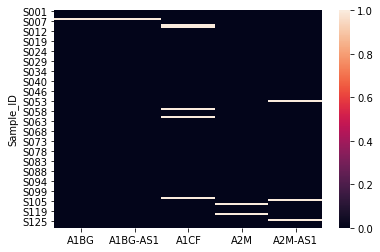

In [39]:
#This is a test for a heatmap visualization as an option for Black_Sheep output
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(outlierTable(transcriptomics_small))
plt.show()

In [103]:
'''
This is a test class to learn basic OOP in python, and
to learn how to return all the class variables as a 
possibility for Black Sheep
'''
class test:
    x = 5
    y = 4
    z = 3
    
    #One attempt at returning all the class variables
    def __init__(self):
        print('Here are the values:')
        print(test.x, test.y, test.z)
    
    def pythagoreanTheorem(self, x, y, z):
        print('Welcome to the Pythagorean Theorem:')
        '''
        print('Input your x value:')
        x = input()
        print('Input your y value:')
        y = input()
        print('Input your z value:')
        z = input()
        '''
        self.x = x
        self.y = y
        self.z = z
        return(x**2 + y**2 + z**2)
    
    #Here is a dictionary method for returning data as a possibillity for Black Sheep
    def returnAll(self):
        print('Here are the values for x, y and z in a dictionary:')
        new_dictionary = {'x' : test.x, 'y': test.y, 'z': test.z}
        print(new_dictionary)

In [104]:
test1 = test()
test1.pythagoreanTheorem(1,2,3)

Here are the values:
5 4 3
Welcome to the Pythagorean Theorem:


14

In [105]:
test1.returnAll()

Here are the values for x, y and z in a dictionary:
{'x': 5, 'y': 4, 'z': 3}
